# Outlier Detection and Elimination

Question 1

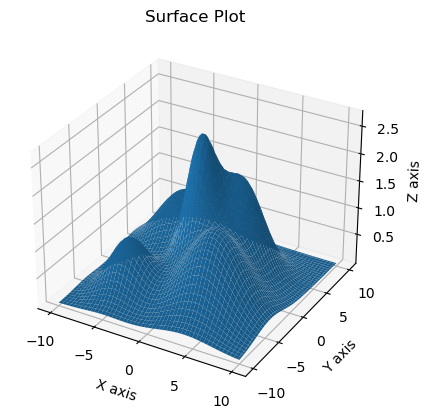

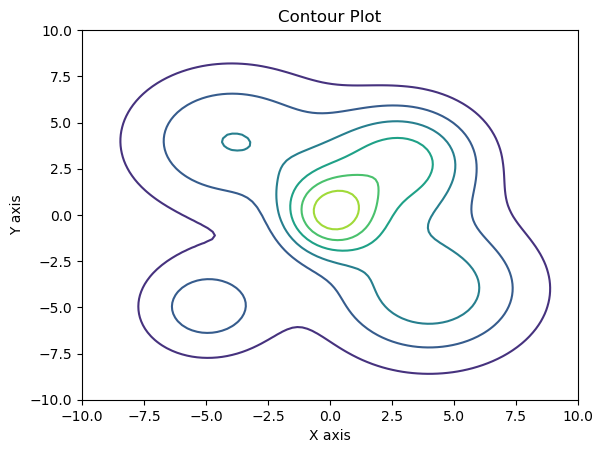

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(x, y):
    return 1.7*np.exp(-((x-3)**2/10 + (y-3)**2/10)) + np.exp(-((x+5)**2/8 + (y+5)**2/8)) + 2*np.exp(-((x)**2/4 + (y)**2/5)) + 1.5*np.exp(-((x-4)**2/18 + (y+4)**2/16)) + 1.2*np.exp(-((x+4)**2/18 + (y-4)**2/16))

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('Surface Plot')
plt.show()

plt.contour(X, Y, Z)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Contour Plot')
plt.show()


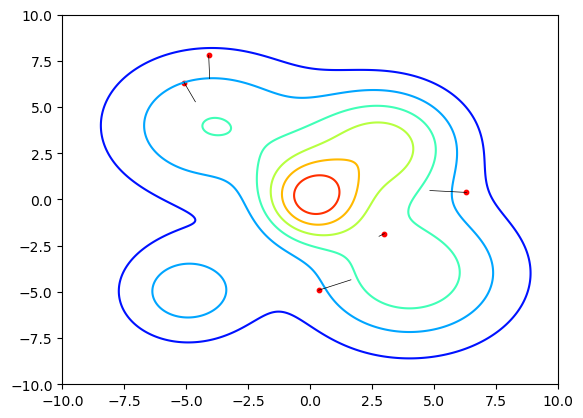

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    z = 1.7 * np.exp(-((x - 3)**2 / 10 + (y - 3)**2 / 10)) + \
        np.exp(-((x + 5)**2 / 8 + (y + 5)**2 / 8)) + \
        2 * np.exp(-((x**2 / 4) + (y**2 / 5))) + \
        1.5 * np.exp(-((x - 4)**2 / 18 + (y + 4)**2 / 16)) + \
        1.2 * np.exp(-((x + 4)**2 / 18 + (y - 4)**2 / 16))
    return z

def gradient_ascent(x, y, learning_rate=0.05, num_iterations=100):
    for i in range(num_iterations):
        gradient_x = (f(x + 0.01, y) - f(x, y)) / 0.01
        gradient_y = (f(x, y + 0.01) - f(x, y)) / 0.01
        x += learning_rate * gradient_x
        y += learning_rate * gradient_y
    return x, y

def plot_contours_and_trajectories(num_initial_values=5, num_iterations=100):
    x = np.linspace(-10, 10, 1000)
    y = np.linspace(-10, 10, 1000)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, cmap='jet')
    initial_values = np.random.uniform(-10, 10, (num_initial_values, 2))
    for x0, y0 in initial_values:
        x, y = gradient_ascent(x0, y0, num_iterations=num_iterations)
        ax.plot([x0, x], [y0, y], 'k-', lw=0.5)
    ax.scatter(initial_values[:, 0], initial_values[:, 1], color='red', s=10)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    plt.show()

plot_contours_and_trajectories()


Question 2

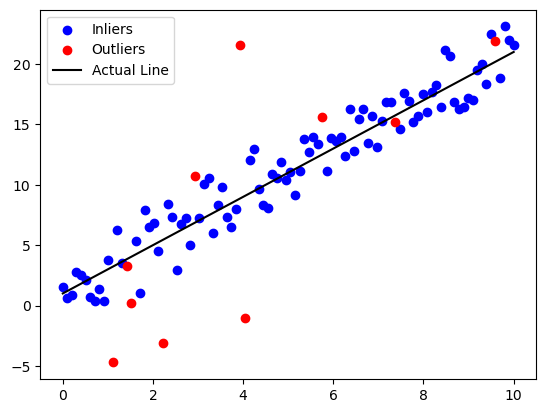

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data_set(a, b, x_min, x_max, n, alpha, sigma):
    x = np.linspace(x_min, x_max, n)
    y_actual = a * x + b
    y_noisy = y_actual + sigma * np.random.randn(n)
    
    outlier_indices = np.random.choice(np.arange(n), int(n * alpha), replace=False)
    y_outlier = y_noisy[outlier_indices] + np.random.randn(len(outlier_indices)) * 4 * sigma
    y_noisy[outlier_indices] = y_outlier
    
    return x, y_actual, y_noisy, outlier_indices

def plot_data(x, y_actual, y_noisy, outlier_indices):
    fig, ax = plt.subplots()
    inlier_indices = np.delete(np.arange(len(x)), outlier_indices)
    ax.scatter(x[inlier_indices], y_noisy[inlier_indices], color='blue', label='Inliers')
    ax.scatter(x[outlier_indices], y_noisy[outlier_indices], color='red', label='Outliers')
    ax.plot(x, y_actual, color='black', label='Actual Line')
    ax.legend()
    plt.show()

a = 2
b = 1
x_min = 0
x_max = 10
n = 100
alpha = 0.1
sigma = 1.5
x, y_actual, y_noisy, outlier_indices = generate_data_set(a, b, x_min, x_max, n, alpha, sigma)
plot_data(x, y_actual, y_noisy, outlier_indices)


Question 3

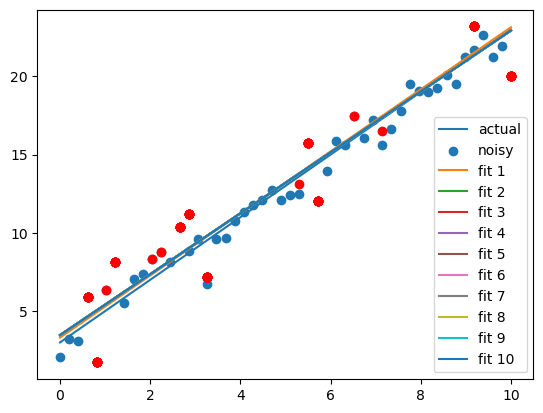

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def generateDataSet(a, b, xmin, xmax, n, alpha, sigma):
    x = np.linspace(xmin, xmax, n)
    y_actual = a * x + b
    y_noisy = y_actual + sigma * np.random.randn(n)
    outliers = np.random.randint(0, n, int(alpha * n))
    y_outlier = y_noisy.copy()
    y_outlier[outliers] += np.abs(sigma * np.random.randn(len(outliers)))
    return x, y_actual, y_noisy, y_outlier

def outlierCorrection(y_noisy, alpha):
    n = len(y_noisy)
    errors = y_noisy - y_actual
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    outliers = np.where(np.abs(errors) > mean_error + 1 * std_error)
    return outliers

def fitLine(x, y):
    a, b = np.polyfit(x, y, 1)
    return a, b

def plotData(x, y_actual, y_noisy, y_outlier, outliers, iterations):
    fig, ax = plt.subplots()
    ax.plot(x, y_actual, label='actual')
    ax.scatter(x, y_noisy, label='noisy')
   
    for i in range(iterations):
        ax.scatter(x[outliers], y_outlier[outliers], color='red')
        x_inliers = np.delete(x, outliers)
        y_inliers = np.delete(y_outlier, outliers)
        a, b = fitLine(x_inliers, y_inliers)
        y_fitted = a * x + b
        outliers = outlierCorrection(y_outlier, alpha)
        ax.plot(x, y_fitted, label=f'fit {i+1}')
    ax.legend()
    plt.show()

a = 2
b = 3
xmin = 0
xmax = 10
n = 50
alpha = 0.49
sigma = 1
iterations = 10

x, y_actual, y_noisy, y_outlier = generateDataSet(a, b, xmin, xmax, n, alpha, sigma)
outliers = outlierCorrection(y_noisy, alpha)
plotData(x, y_actual, y_noisy, y_outlier, outliers, iterations)


Question 4

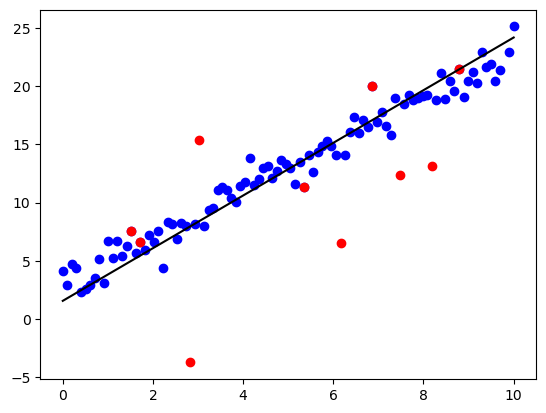

In [57]:
import numpy as np

def RANSAC(x, y, sigma, min_samples, max_iterations, inlier_threshold):
    best_model = None
    best_inliers = []
    
    for iteration in range(max_iterations):
        sample_indices = np.random.choice(np.arange(len(x)), size=min_samples, replace=False)
        sample_x = x[sample_indices]
        sample_y = y[sample_indices]
        
        model = np.polyfit(sample_x, sample_y, 1)
        
        y_pred = model[0] * x + model[1]
        residuals = np.abs(y - y_pred)
        
        inliers = np.where(residuals <= inlier_threshold * sigma)[0]
        if len(inliers) > len(best_inliers):
            best_model = model
            best_inliers = inliers
            
    return best_model, best_inliers

def generate_data_set(a, b, x_min, x_max, n, alpha, sigma):
    x = np.linspace(x_min, x_max, n)
    y_actual = a * x + b
    y_noisy = y_actual + sigma * np.random.randn(n)
    
    outlier_indices = np.random.choice(np.arange(n), int(n * alpha), replace=False)
    y_outlier = y_noisy[outlier_indices] + np.random.randn(len(outlier_indices)) * 4 * sigma
    y_noisy[outlier_indices] = y_outlier
    
    return x, y_actual, y_noisy, outlier_indices

x, y_actual, y_noisy, outlier_indices = generate_data_set(2, 3, 0, 10, 100, 0.1, 1)
best_model, best_inliers = RANSAC(x, y_noisy, 1, 2, 100, 3)

import matplotlib.pyplot as plt
plt.scatter(x[best_inliers], y_noisy[best_inliers], color='blue')
plt.scatter(x[outlier_indices], y_noisy[outlier_indices], color='red')
plt.plot(x, best_model[0] * x + best_model[1], color='black')
plt.show()
